In [1]:
import numpy as np
import tensorflow
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from keras.datasets import cifar100

2022-11-24 20:47:15.836675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(trainX, trainY), (testX, testY) = cifar100.load_data()

In [3]:
# Target classes: numbers to text
# Source: https://github.com/keras-team/keras/issues/2653#issuecomment-450133996
classes = [
  'apple',
  'aquarium_fish',
  'baby',
  'bear',
  'beaver',
  'bed',
  'bee',
  'beetle',
  'bicycle',
  'bottle',
  'bowl',
  'boy',
  'bridge',
  'bus',
  'butterfly',
  'camel',
  'can',
  'castle',
  'caterpillar',
  'cattle',
  'chair',
  'chimpanzee',
  'clock',
  'cloud',
  'cockroach',
  'couch',
  'crab',
  'crocodile',
  'cup',
  'dinosaur',
  'dolphin',
  'elephant',
  'flatfish',
  'forest',
  'fox',
  'girl',
  'hamster',
  'house',
  'kangaroo',
  'computer_keyboard',
  'lamp',
  'lawn_mower',
  'leopard',
  'lion',
  'lizard',
  'lobster',
  'man',
  'maple_tree',
  'motorcycle',
  'mountain',
  'mouse',
  'mushroom',
  'oak_tree',
  'orange',
  'orchid',
  'otter',
  'palm_tree',
  'pear',
  'pickup_truck',
  'pine_tree',
  'plain',
  'plate',
  'poppy',
  'porcupine',
  'possum',
  'rabbit',
  'raccoon',
  'ray',
  'road',
  'rocket',
  'rose',
  'sea',
  'seal',
  'shark',
  'shrew',
  'skunk',
  'skyscraper',
  'snail',
  'snake',
  'spider',
  'squirrel',
  'streetcar',
  'sunflower',
  'sweet_pepper',
  'table',
  'tank',
  'telephone',
  'television',
  'tiger',
  'tractor',
  'train',
  'trout',
  'tulip',
  'turtle',
  'wardrobe',
  'whale',
  'willow_tree',
  'wolf',
  'woman',
  'worm',
]

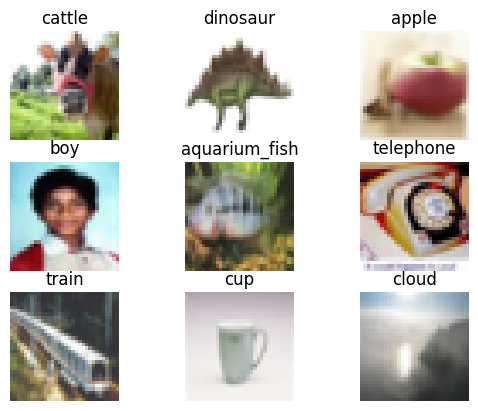

In [4]:
# Visualize firt 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    image = trainX[i]
    target = trainY[i][0]
    plt.axis('off')
    plt.imshow(image)
    plt.title(f'{classes[target]}')
plt.show()

In [5]:
trainX = trainX.reshape(trainX.shape[0], 32,32,3)
trainY = trainY.reshape(trainY.shape[0], 1)
testX = testX.reshape(testY.shape[0], 32, 32, 3)
testY = testY.reshape(testY.shape[0], 1)

In [6]:
# Parse numbers as floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Normalize data
trainX = trainX / 255.0
testX = testX / 255.0

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), kernel_regularizer = l2(0.005), activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.005), activation = 'elu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.005), activation = 'elu')) 
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.005), activation = 'elu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'elu'))
model.add(Dense(units = 256, activation = 'elu'))
model.add(Dense(units = 100, activation = 'softmax'))

2022-11-24 20:48:35.341760: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
rlrop = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)

In [10]:
early_stop = EarlyStopping(monitor = 'val_loss',
                          mode = 'min',
                          verbose = 1,
                          patience = 30)

In [12]:
history = model.fit(trainX, trainY,
                         steps_per_epoch = 400,
                         epochs = 5,
                         #verbosity = 1,
                         validation_split = 0.2,
                         callbacks = [rlrop, early_stop])

Epoch 1/5
400/400 [==============================] - 144s 361ms/step - loss: 2.7037 - accuracy: 0.4518 - val_loss: 3.9164 - val_accuracy: 0.2820 - lr: 0.0010
Epoch 2/5
400/400 [==============================] - 142s 356ms/step - loss: 2.6376 - accuracy: 0.4678 - val_loss: 3.6371 - val_accuracy: 0.3044 - lr: 0.0010
Epoch 3/5
400/400 [==============================] - 167s 417ms/step - loss: 2.5958 - accuracy: 0.4834 - val_loss: 3.3637 - val_accuracy: 0.3575 - lr: 0.0010
Epoch 4/5
400/400 [==============================] - 147s 366ms/step - loss: 2.5437 - accuracy: 0.5000 - val_loss: 3.7659 - val_accuracy: 0.3006 - lr: 0.0010
Epoch 5/5
400/400 [==============================] - 149s 373ms/step - loss: 2.5071 - accuracy: 0.5081 - val_loss: 3.5479 - val_accuracy: 0.3465 - lr: 0.0010


In [ ]:
model.save('Version_Final.h5')

In [ ]:
model.summary()

In [ ]:
# Generate generalization metrics
score = model.evaluate(testX, testY, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
testY_pred = model.predict(testX)

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['loss'], label = 'train_loss')
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [ ]:
import random
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 3
# Visualize firt 9 images
for i in range(1,10):
    fig.add_subplot(rows, columns, i)
    k = random.randrange(10000)
    image = testX[k]
    target_pred = testY_pred[k].tolist().index(testY_pred[k].max())
    target_actual = testY[k][0]
    plt.axis('off')
    plt.imshow(image)
    plt.title(classes[target_pred]+' ('+classes[target_actual]+')')
plt.show()